# ESERCIZIO 3

 Una variabile aleatoria X ha densit`a
 f(x) =
 
 
 
 − 3
 4x2 + 3
 2x
 0
 x ∈[0,2]
 altrimenti
 1. Decrivere e implementare un algoritmo per generare numeri pseudo-casuali con distribuzione X
 utilizzando il metodo del rigetto.
 2. Generare numericamente 105 di questi numeri e costruire un istogramma. Verificare infine che
 essi seguano approssimativamente la distribuzione assegnata sovrapponendo all’istogramma il
 grafico di f(x) in [0,2].

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def fun(x):
    if 0<=x<=2:
        return -(3/4)*x**2 + (3/2)*x
    else:
        return 0

a=0
b=2
M=max(fun(x) for x in np.linspace(a,b,1000))

def rigetto(a,b,M):
    while True:
        r1 = np.random.rand()
        r2 = np.random.rand()
        xi = a + r1*(b-a)
        eta = M*r2
        if eta <= fun(xi):
            break
    return xi 


display(M)



0.7499992484977471

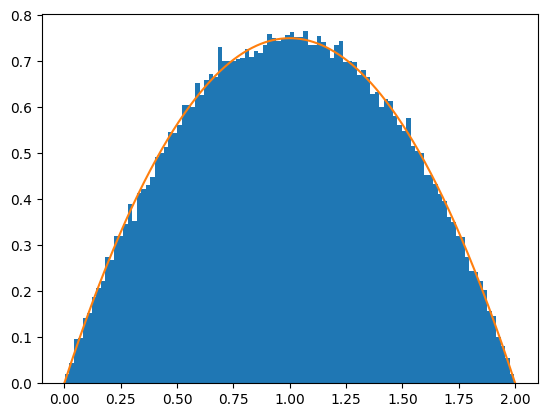

In [15]:
# 2 

num_samples=10**5

X=np.zeros(num_samples)

for i in range(num_samples):
    X[i]=rigetto(a,b,M)

xx=np.linspace(a,b,1000)
yy=[fun(i) for i in xx]


fig, ax=plt.subplots(1,1)
ax.hist(X,bins=100,density=True)
plt.plot(xx,yy)
plt.show()



# ESERCIZIO 1

 Il tempo di vita di un dispositivo meccanico sottoposto a vibrazioni durante un test segue una
 distribuzione esponenziale con media 400 ore.
 1. Qual  e la probabilita che il dispositivo fallisca il test in meno di 100 ore?
 2. Qual e la probabilita che il dispositivo operi per pi` u di 500 ore prima di rompersi?
 3. Sapendo che il dispositivo ha operato per 400 ore senza fallire il test, qual  e la probabilita che
 fallisca nelle prossime 100 ore?
 4. Quante ore di funzionamento sono necessarie per affermare che il dispositivo fallisca il test con
 probabilit`a superiore al 95%?

In [5]:
# 1 
from scipy.stats import expon
lam=400

p=expon.cdf(100, scale=lam)

display(p)


0.22119921692859515

In [6]:
# 2
p=expon.sf(500,scale=lam)

display(p)

0.2865047968601901

In [8]:
# 3
# x = 400
r = 100
# P(X > x + r) = P(X > r) per la proprieta della mancanza memoria

p3 = expon.sf(r, scale=lam)
print(p3)

0.7788007830714049


In [10]:
# 4 
import numpy as np
p0=0.05
lam=1/400




#calcolare il valore di t tale che P(T<p) > 0.95
p=np.log(p0)/-lam

display(p)

1198.2929094215963

per poter effettuare questo calcolo siamo arrivati a una soluzione matematica

la cdf della esponenziale è = 1-e^-lam(t)

dove lambda è l'inverso della media= 1/400

dobbiamo trovare che la cdf sia >0.95

1-𝑒^−𝜆𝑡<0.05

Isoliamo il termine esponenziale:

𝑒^−𝜆𝑡<0.05

Prendiamo il logaritmo naturale di entrambi i lati:

−𝜆𝑡<ln(0.05)


𝑡>ln(0.05)/−𝜆

Sostituiamo 𝜆

𝑡>ln(0.05)/(−1/400)



# ESERCIZIO 2

 Si ritiene che i grammi di solidi rimossi da un materiale (y) siano correlati al tempo di asciugatura
 (x) espresso in ore. Da uno studio sperimentale si ottengono le 10 misurazioni riportate nella seguente
 tabella.
 x 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.0 6.5 7.0
 y 4.3 1.5 1.8 4.9 4.2 4.8 5.8 6.2 7.0 7.9
 1. Si determinino i coefficienti della retta di regressione e i loro intervalli di confidenza al 95%. Si
 calcoli il coefficiente di determinazione.
 2. Si rappresentino i dati e la retta di regressione in uno stesso grafico.
 3. Si stimi la quantita in grammi di solidi rimossi a 4.25 ore.
 4. Si effettui il test di indipendenza con un livello di significativita α = 0.05 commentandone l’esito.

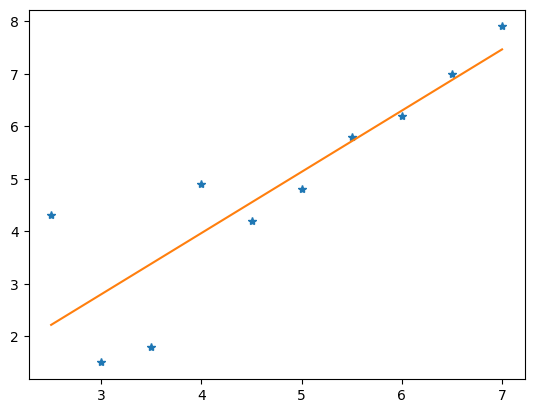

In [15]:
#1

from scipy.stats import t
import numpy as np

x= np.array([2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0])
y= np.array([4.3, 1.5, 1.8, 4.9, 4.2, 4.8, 5.8, 6.2, 7.0, 7.9,])

n=np.size(x)

y_bar= np.mean(y)
x_bar=np.mean(x)

sigma_xy=np.sum((x-x_bar)*(y-y_bar))/n

sig_x2=np.sum(x**2-x_bar**2)/n


b0=y_bar-(sigma_xy/sig_x2)*x_bar
b1=sigma_xy/sig_x2



xx=np.linspace(2.5,7,100)
yy=b0+b1*xx
import matplotlib.pyplot as plt

plt.plot(x,y,'*')
plt.plot(xx,yy)
plt.show()


In [ ]:
# intervallo di confidenza al 95%

In [16]:
#calcolo residui
y_hat=b0+b1*x
r=y-y_hat

s2=np.sum(r**2)/(n-2)

#intervalli di confidenza
alpha=0.05

T=t.ppf(1-alpha/2,n-2)

b0_l=b0-np.sqrt(s2)*np.sqrt(1/n+x_bar**2/(n*sig_x2))*T
b0_r=b0+np.sqrt(s2)*np.sqrt(1/n+x_bar**2/(n*sig_x2))*T                        

b1_l=b1-np.sqrt(s2)/np.sqrt(n*sig_x2)*T
b1_r=b1+np.sqrt(s2)/np.sqrt(n*sig_x2)*T


display(b0_l,b0_r)
display(b1_l,b1_r)

-3.4961586035138112

2.098582845938051

0.6023426014762793

1.7297786106449333

In [ ]:
# FARE PUNTO 3 E 4